Udacity Data Scientist Nanodegree Project 1: Working through the CRISP-DM process
===============

# Introduction
The CRISP-DM or cross-industry standard process for data mining process is an open process model that allows us to carry out data mining using defined and systematic steps. This method was proven to be efficient while using data to provide insight and offer solutions for businesses.

This process comprises of six major phases that we will work through here:
- Business Understanding
- Data Understanding
- Data Preparation
- Modeling
- Evaluation
- Deployment

In the case of the Udacity Project here, we had to select a dataset before starting the CRISP-DM process. I decided to work with the Stackoverflow surveys data from 2019 to 2022.

## Business Understanding
This include questions that a business is asking and needs solutions for. 
My three main business questions are:

{pick a demographic - data science people}
- What type of cloud platform do data scientist want to learn to use?
- What coding languages are in demand in the data science world. 
- 

In [2]:
## Data Understanding
### Looking at the data


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
%matplotlib inline

df2022 = pd.read_csv('./survey_results_public2022.csv')

In [4]:
df2022.shape

(73268, 79)

In 2022, more than 73000 people answered the survey in Stackoverflow

In [41]:
#Let's take a look at the column headers
df2022.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

In [ ]:
My questions are related to the Data Science field so I will first subset the survey results by data science jobs.

In [42]:
df2022['DevType'].unique()

array([nan,
       'Data scientist or machine learning specialist;Developer, front-end;Engineer, data;Engineer, site reliability',
       'Developer, full-stack', ...,
       'Data scientist or machine learning specialist;Developer, front-end;Developer, full-stack;Developer, back-end;Developer, QA or test;Developer, mobile;Database administrator;Cloud infrastructure engineer;Data or business analyst;Designer;Blockchain',
       'Developer, front-end;Developer, full-stack;Developer, back-end;Developer, desktop or enterprise applications;Developer, mobile;Educator;Developer, embedded applications or devices',
       'Developer, front-end;Engineer, data;Engineer, site reliability;Developer, full-stack;Developer, back-end;Developer, desktop or enterprise applications;Developer, QA or test;Student;Developer, mobile;Academic researcher;DevOps specialist;Developer, embedded applications or devices;Developer, game or graphics;Cloud infrastructure engineer;Data or business analyst;Designer;Scie

In [ ]:
A lot of the participants have different DevType roles, so we first need to expode the DevType column, before subsetting. 

In [45]:
df2022_explode_devtype = df2022.assign(devtype=df2022.DevType.str.split(';')).explode('devtype').reset_index(drop=True)


In [46]:
df2022_explode_devtype['devtype'].value_counts()

Developer, full-stack                            28701
Developer, back-end                              26595
Developer, front-end                             15915
Developer, desktop or enterprise applications     9546
Developer, mobile                                 7634
DevOps specialist                                 6170
Student                                           5595
Cloud infrastructure engineer                     5283
Database administrator                            4934
System administrator                              4908
Developer, embedded applications or devices       3923
Project manager                                   3897
Designer                                          3764
Engineer, data                                    3600
Engineering manager                               3574
Data scientist or machine learning specialist     3424
Data or business analyst                          3201
Developer, QA or test                             3096
Academic r

I will subset all the rows that have devtype as Data scientist or machine learning specialist, Data or business analyst  and Engineer, data

In [54]:
data=['Engineer, data', 'Data scientist or machine learning specialist','Data or business analyst']
df2022_DS=df2022_explode_devtype[df2022_explode_devtype['devtype'].isin(data)]
df2022_DS['devtype'].unique(), df2022_DS.shape

(array(['Data scientist or machine learning specialist', 'Engineer, data',
        'Data or business analyst'], dtype=object),
 (10225, 80))

In [64]:
df2022_DS.index.nunique() # this is the number of participants

10225

Interestingly, there are no replicated indexes so no participant considered themselves more than one devtype among the DS roles.

<AxesSubplot:>

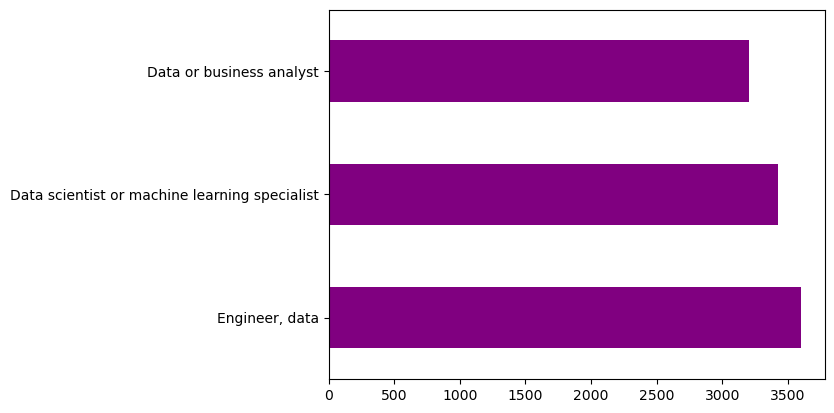

In [141]:
#distribution of devtype in DS
df2022_DS.devtype.value_counts().plot(kind='barh',color='purple')

Among these >10000 DS participants, about 1/3 were either one of the three devtypes, but there is the most of data engineers.

In [65]:
# What platforms did DS people use in 2022?
df2022_DS.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

## Question 1: What cloud platforms people want to learn?
To answer this question, we will compare the platforms participants currently work on and the ones they wish to learn how to use.

- make a visualization of platform use

In [66]:
#explode by current platform
df2022_DS_explode_currentplatform = df2022_DS.assign(platform=df2022.PlatformHaveWorkedWith.str.split(';')).explode('platform').reset_index(drop=True)


In [70]:
df2022_DS_explode_currentplatform['platform'].unique() 

array([nan, 'Firebase', 'Microsoft Azure', 'DigitalOcean', 'Google Cloud',
       'VMware', 'Heroku', 'AWS', 'Linode', 'OVH', 'Managed Hosting',
       'Colocation', 'IBM Cloud or Watson', 'OpenStack',
       'Oracle Cloud Infrastructure'], dtype=object)

<AxesSubplot:ylabel='platform'>

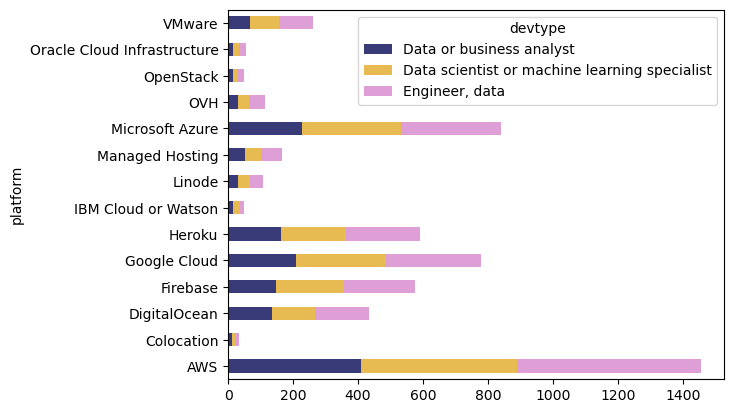

In [147]:
df2022_DS_explode_currentplatform.groupby(['platform'])['devtype'].value_counts().unstack().plot(kind='barh', stacked=True,mark_right=True,colormap='tab20b')

In [83]:
df2022_DS.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

<AxesSubplot:ylabel='platform'>

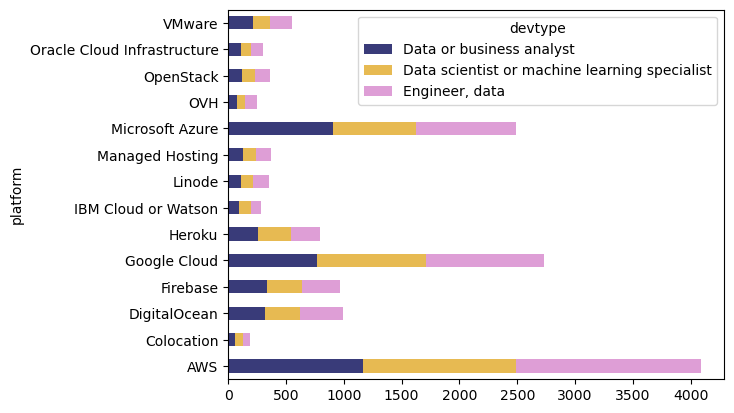

In [143]:
df2022_DS_explode_wantplat = df2022_DS.assign(platform=df2022_DS.PlatformWantToWorkWith.str.split(';')).explode('platform').reset_index(drop=True)
df2022_DS_explode_wantplat.groupby(['platform'])['devtype'].value_counts().unstack().plot(kind='barh', stacked=True,colormap='tab20b')

Since the two previous plot do not show me clearly what platforms DS people want to work on relatively to what they are working on now, I decided to calculate a ratio, where I divide the proportion of people wanting to learn a given platform by the proportion of people who are currently working on that platform. I substrated 1 to make my graph and separate out that platforms more people are wanting to work on.

ratio = (proportion platform want to work on / proportion platform using)-1

In [182]:

ratio = (df2022_DS_explode_wantplat.groupby(['platform'])['devtype'].value_counts(normalize=True)/df2022_DS_explode_currentplatform.groupby(['platform'])['devtype'].value_counts(normalize=True))-1

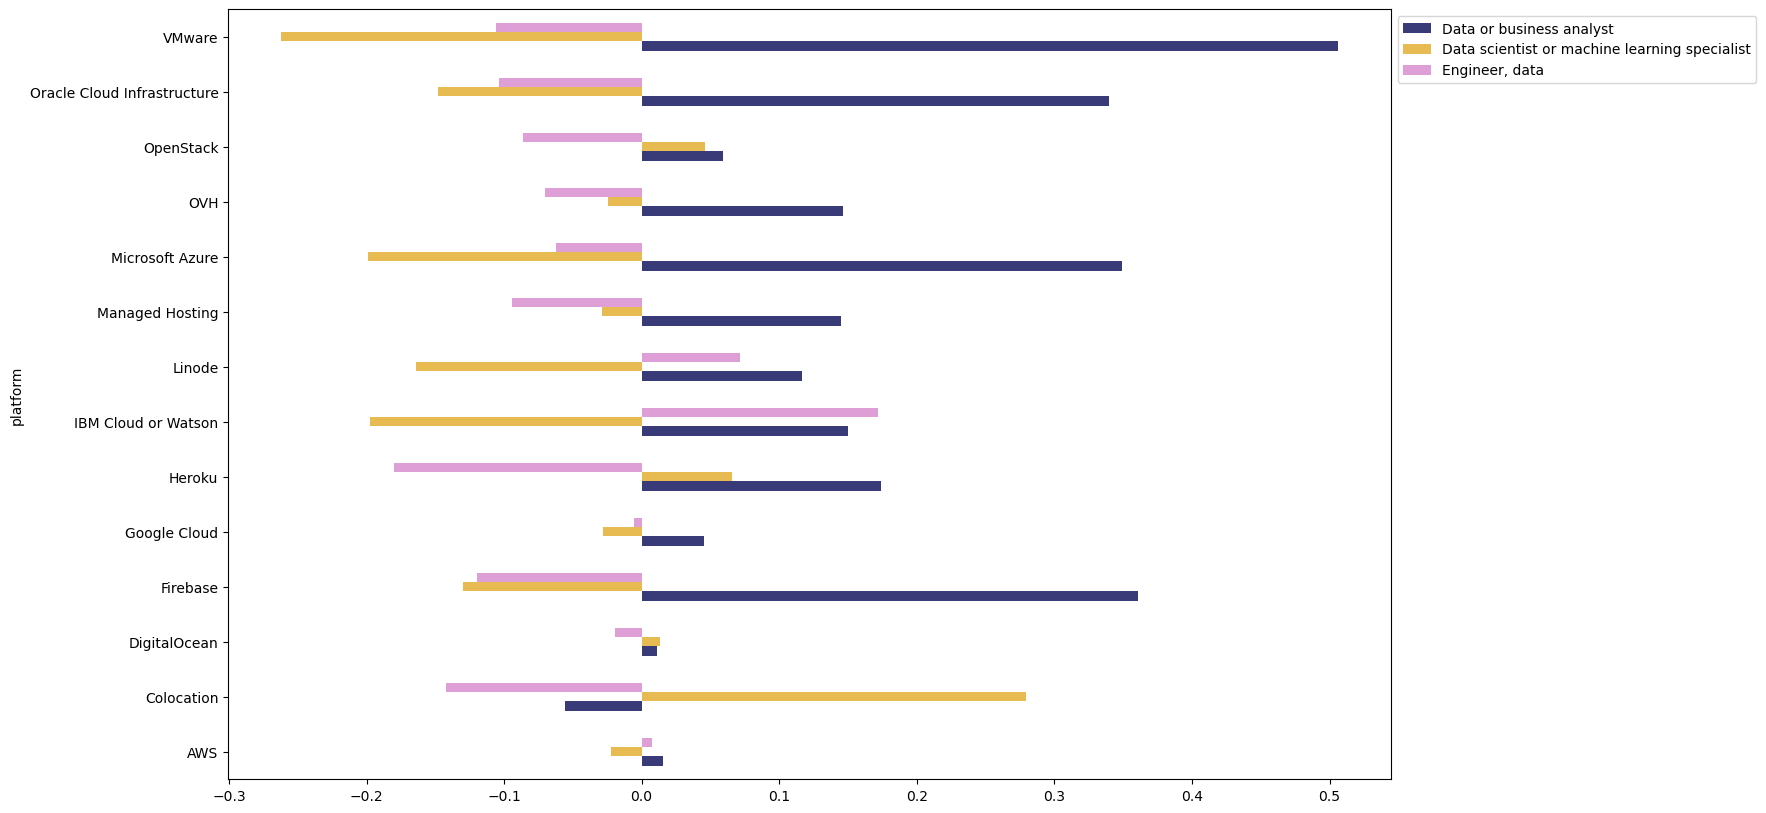

In [183]:
ratio.unstack().plot(kind='barh',colormap='tab20b',figsize=(15, 10)).legend(bbox_to_anchor=(1.0, 1.0))

In [114]:
df2022_DS.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

## Question 2: what programming languages should data science people learn?
In order to answer that question, I decided to examine
'LanguageHaveWorkedWith',
'LanguageWantToWorkWith'
'LearnCodeCoursesCert' -> to see what vertification stands out by coding language
'DevType' -> by dev type is an important 

Since I have filtered by country (USA) and by people who code as a profession, I will do the same here.

Let's take a look at the features I want to examine.

In [113]:
df2022_DS['devtype'].unique()

array(['Data scientist or machine learning specialist', 'Engineer, data',
       'Data or business analyst'], dtype=object)

In [158]:
df2022_DS.LanguageHaveWorkedWith.unique().tolist()

['C#;C++;HTML/CSS;JavaScript;Python',
 'Python;SQL',
 'Bash/Shell;Groovy;HTML/CSS;Java;JavaScript;Perl;PHP;Scala;SQL',
 'C#;C++;HTML/CSS;JavaScript;SQL;TypeScript;VBA',
 'Bash/Shell;HTML/CSS;Python;SQL',
 'Bash/Shell;Julia;Python',
 'Bash/Shell;HTML/CSS;Python',
 'Bash/Shell;Java;Python;SQL',
 'Python;R;SQL',
 'Python;R',
 'C#;HTML/CSS;Java;JavaScript;Python;SQL;VBA',
 'Python;SQL;VBA',
 'C#',
 'Go;Java;Python',
 'JavaScript;Python;SQL',
 'C#;Python',
 'C++;Julia;Python;Rust',
 'Java;JavaScript;Rust',
 'Bash/Shell;HTML/CSS;Java;JavaScript;Python;SQL',
 'Go;HTML/CSS;Java;JavaScript;Python;SQL',
 'Bash/Shell;C++;HTML/CSS;JavaScript;Python;R;TypeScript',
 'Clojure;Java;Rust',
 'Python;Rust;TypeScript',
 'Bash/Shell;C;C++;HTML/CSS;JavaScript;PHP;Python;SQL',
 'Bash/Shell;Python;SQL',
 'C;JavaScript;Python;SQL;TypeScript',
 'Python;Scala;SQL',
 'HTML/CSS;Python;Ruby;SQL;VBA',
 'HTML/CSS;JavaScript;PHP;Python;SQL',
 'Bash/Shell;C;Java;Python',
 'HTML/CSS;JavaScript;MATLAB;Python;R;Rust;SQL',

In [159]:
df2022_DS.LanguageWantToWorkWith.unique()

array(['C#;C++;HTML/CSS;JavaScript;TypeScript', 'Python;SQL',
       'Bash/Shell;Dart;Go;Groovy;HTML/CSS;Java;Perl;Scala;SQL', ...,
       'Bash/Shell;Go;HTML/CSS;Java;JavaScript;PowerShell;Python;Scala;SQL;TypeScript',
       'APL;C;C#;C++', 'PowerShell;Rust;TypeScript'], dtype=object)

These features have the same challenge as platform features, so I have to use explode() to separate the values and get counts for each language. The plan: separate devtype into new rows, then subset by devtypes, then explode each language column to make counts per dev type.

Now from this subset of 532 data scientists, let look at the languages they are using and the ones they want to learn about.

<AxesSubplot:ylabel='language'>

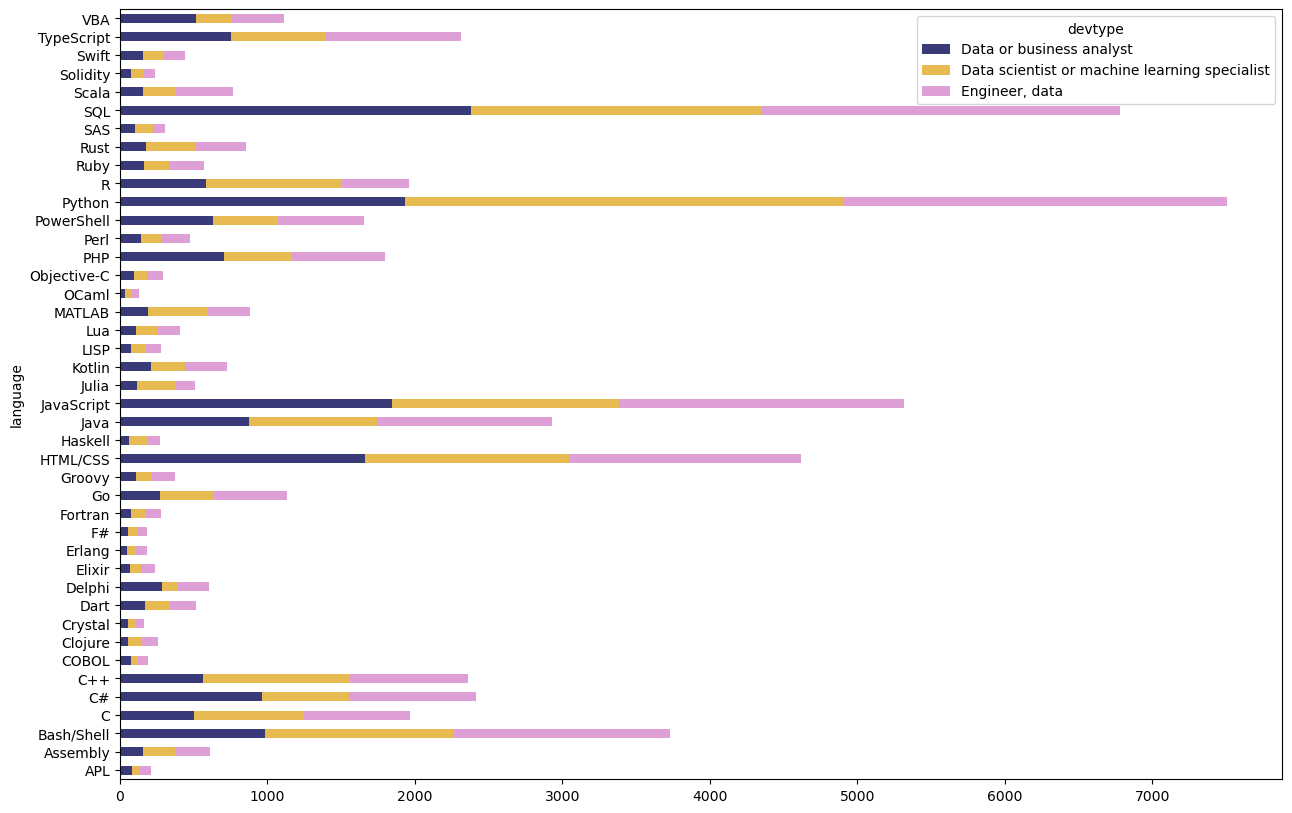

In [175]:
df2022_DS_explode_currentlanguage = df2022_DS.assign(language=df2022_DS.LanguageHaveWorkedWith.str.split(';')).explode('language').reset_index(drop=True)
df2022_DS_explode_currentlanguage.groupby(['language'])['devtype'].value_counts().unstack().plot(kind='barh', stacked=True,colormap='tab20b',figsize=(15,10))

<AxesSubplot:ylabel='language'>

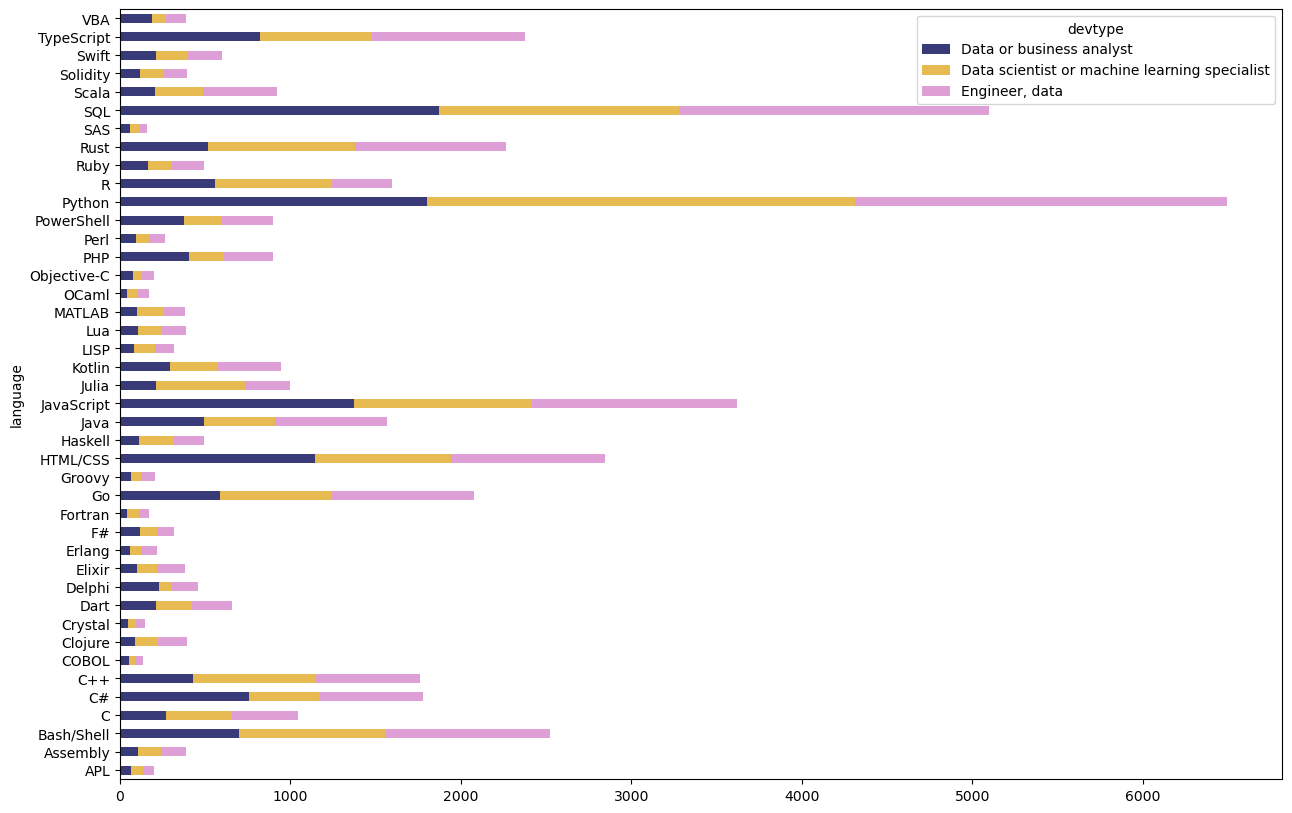

In [176]:
df2022_DS_explode_wantlanguage = df2022_DS.assign(language=df2022_DS.LanguageWantToWorkWith.str.split(';')).explode('language').reset_index(drop=True)
df2022_DS_explode_wantlanguage.groupby(['language'])['devtype'].value_counts().unstack().plot(kind='barh', stacked=True,colormap='tab20b',figsize=(15,10))





In [189]:

ratioL = (df2022_DS_explode_wantlanguage.groupby(['language'])['devtype'].value_counts(normalize=True)/df2022_DS_explode_currentlanguage.groupby(['language'])['devtype'].value_counts(normalize=True))-1





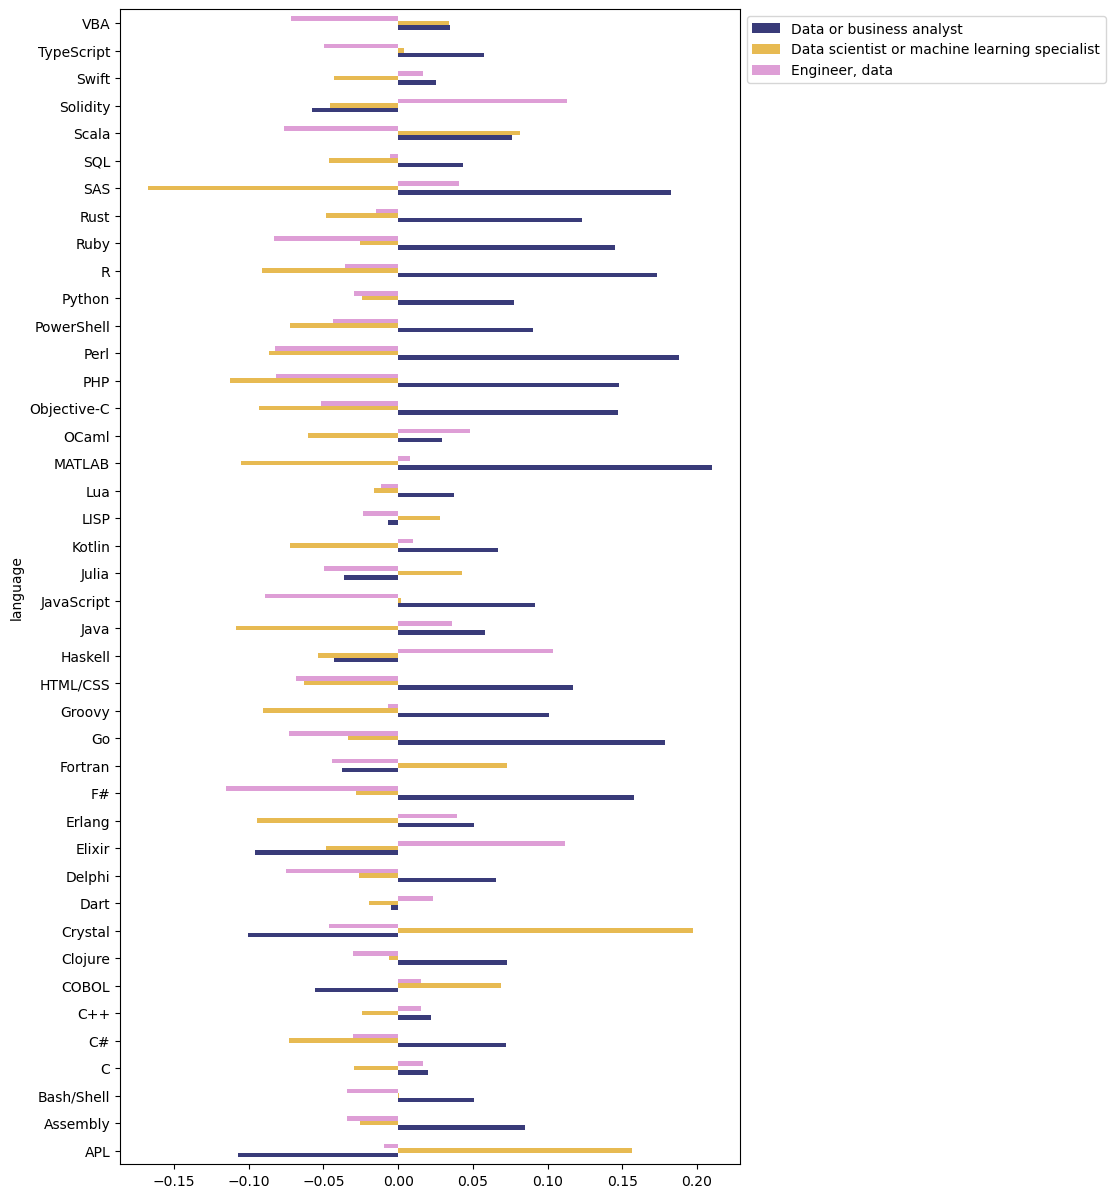

In [195]:
ratioL.unstack().plot(kind='barh',colormap='tab20b',figsize=(8, 15)).legend(bbox_to_anchor=(1.0, 1.0))

In [ ]:
I am also curious to know the languages data scientists want to learn by year of coding professionally. I am going to make age of coding experience plots by languages

<AxesSubplot:title={'center':'Distribution of years of coding experience in Data Scientists'}>

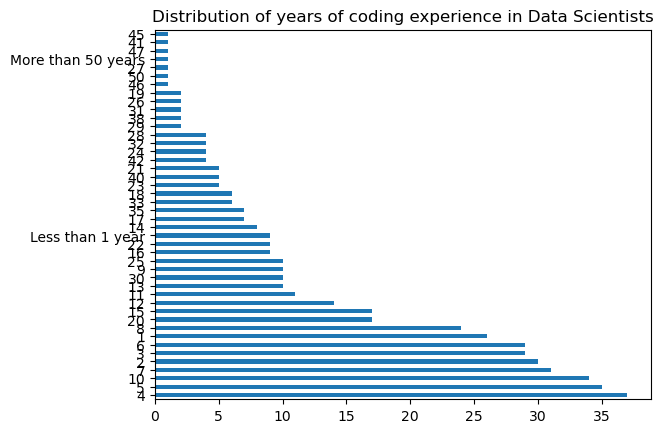

In [277]:
df2022_USpro_DS['YearsCodePro'].value_counts().plot(kind='barh', title='Distribution of years of coding experience in Data Scientists')

The majority of survey participants who are data scientists and machine learning specialists have between 1 and 10 years of experience 

In [280]:
df2022_USpro_DS_explode_wantlanguage.head(3)

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly,devtype,language
0,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,NaN,10,7,...,Somewhat short,Developer portal or other central places to fi...,No,No,Yes,Appropriate in length,Easy,95000.0,Data scientist or machine learning specialist,Clojure
1,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,NaN,10,7,...,Somewhat short,Developer portal or other central places to fi...,No,No,Yes,Appropriate in length,Easy,95000.0,Data scientist or machine learning specialist,Dart
2,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,NaN,10,7,...,Somewhat short,Developer portal or other central places to fi...,No,No,Yes,Appropriate in length,Easy,95000.0,Data scientist or machine learning specialist,Go


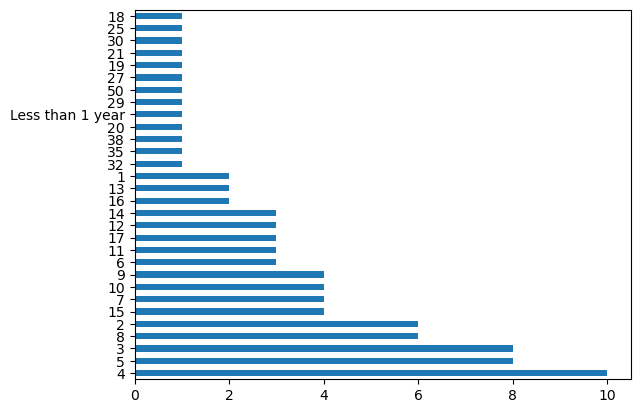

In [274]:
df2022_USpro_DS_explode_wantlanguage[df2022_USpro_DS_explode_wantlanguage['language']=='Julia']['YearsCodePro'].value_counts().plot(kind='barh')

In [313]:
#subset by the 3 top languages
ratio=df2022_USpro_DS_explode_wantlanguage['language'].value_counts()/df2022_USpro_DS_explode_currentlanguage['language'].value_counts()

ratio.sort_values(ascending=False)


Rust           2.581081
Julia          2.177778
F#             2.166667
Haskell        2.050000
Elixir         1.769231
OCaml          1.692308
Clojure        1.578947
Go             1.363636
Erlang         1.363636
Swift          1.354839
LISP           1.214286
Solidity       1.142857
Crystal        1.125000
Dart           1.083333
Scala          1.000000
APL            1.000000
Delphi         1.000000
Kotlin         0.947368
Lua            0.903226
TypeScript     0.891667
Ruby           0.818182
Python         0.801325
R              0.720280
C++            0.690789
Groovy         0.681818
SQL            0.659639
Objective-C    0.625000
C#             0.623762
Bash/Shell     0.582418
JavaScript     0.579151
Assembly       0.567568
C              0.555556
HTML/CSS       0.519048
Perl           0.512821
PowerShell     0.458824
Fortran        0.458333
COBOL          0.444444
Java           0.429630
PHP            0.384615
SAS            0.370370
MATLAB         0.333333
VBA            0

In [317]:
top=['Rust','Julia','F#','Haskell']
top_languages=df2022_USpro_DS_explode_wantlanguage[df2022_USpro_DS_explode_wantlanguage['language'].isin(top)]


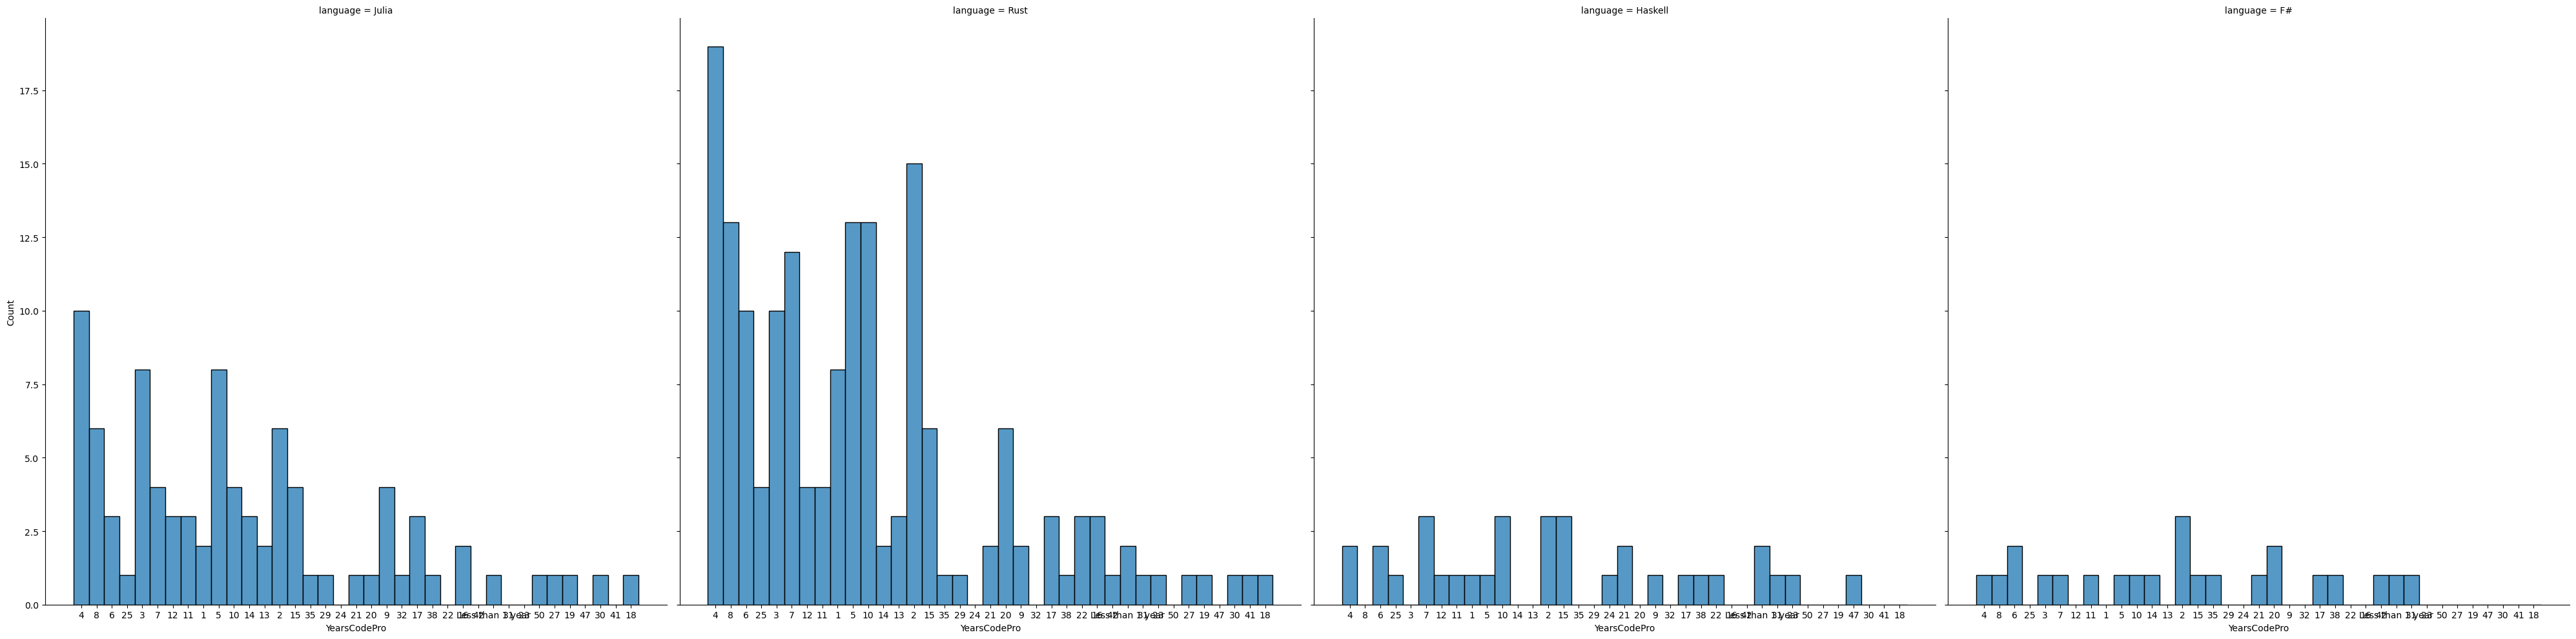

In [328]:
sns.displot(
    top_languages, x="YearsCodePro", col="language", 
    binwidth=3, height=10, facet_kws=dict()
)
#NB: this visual can be improved by reorder the years of experience

Conclusion: starting from 2 years of experience coding professionally, data scientist and machine learning specialists in the US want to learn other languages such as Rust and Julia

Since I am starting in data science and want to find a job, I want to see what languages people with one year or less coding professionally are using and what they want to learn

In [340]:
# subsetting less than one year experience participants
one=['Less than 1 year','1']
DS_one=df2022_USpro_DS[df2022_USpro_DS['YearsCodePro'].isin(one)]
DS_one.shape

(35, 77)

In [337]:
#lets explode() our languages columns and make plots
DS_one_explode_currentlanguage = DS_one.assign(language=DS_less.LanguageHaveWorkedWith.str.split(';')).explode('language').reset_index(drop=True)


(210, 78)

<AxesSubplot:>

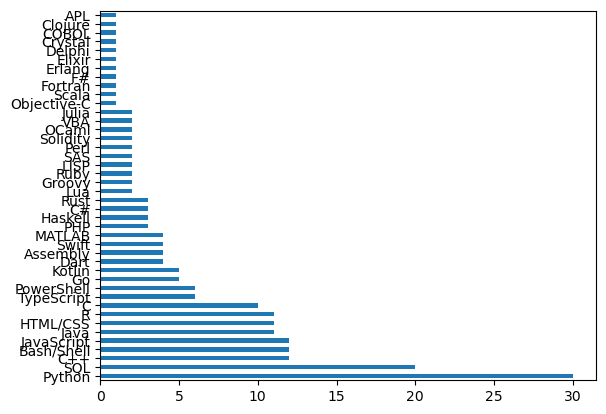

In [338]:
DS_one_explode_currentlanguage['language'].value_counts().plot(kind='barh')

Python and SQL are the most used languages then C++ and Bash/Shell

In [339]:
DS_one_explode_wantlanguage = DS_one.assign(language=DS_less.LanguageWantToWorkWith.str.split(';')).explode('language').reset_index(drop=True)


(165, 78)

<AxesSubplot:>

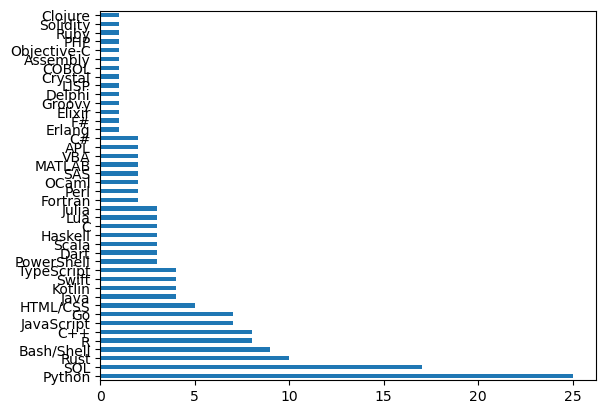

In [341]:
DS_one_explode_wantlanguage['language'].value_counts().plot(kind='barh')

<AxesSubplot:>

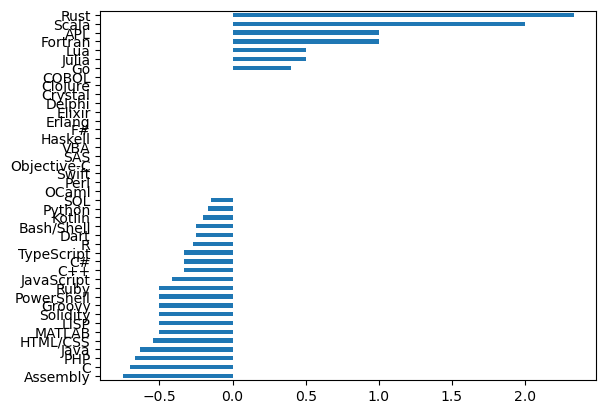

In [345]:
ratio_one=(DS_one_explode_wantlanguage['language'].value_counts()/DS_one_explode_currentlanguage['language'].value_counts())-1
ratio_one.sort_values().plot(kind='barh')

#### Conclusion: Rust and scala are the two top languages that need to be watched as an early career data scientist in the US.

# Question 3: What are the most popular learning platforms among data scientists

Sub question, are students and professionals used/ are using the same learning platforms to learn data science and coding?


In [435]:
# let's explore certifications among data scientists
df2022_US.MainBranch.value_counts()

I am a developer by profession                                                   10288
I am not primarily a developer, but I write code sometimes as part of my work     1256
I code primarily as a hobby                                                       1060
I am learning to code                                                              673
I used to be a developer by profession, but no longer am                           266
Name: MainBranch, dtype: int64

In [443]:
df2022_US.LearnCodeCoursesCert

4                                     NaN
11                                    NaN
12                                    NaN
14                                    NaN
26                                    NaN
                       ...               
73231                                 NaN
73240                                 NaN
73254       Coursera;Udemy;Codecademy;edX
73264              Coursera;Udemy;Udacity
73265    Udemy;Codecademy;Pluralsight;edX
Name: LearnCodeCoursesCert, Length: 13543, dtype: object

In [436]:
# subsetting df2022_US by devtype to filter data scientists
df2022_US.DevType.unique()

array(['Developer, front-end;Developer, full-stack;Developer, back-end;Developer, desktop or enterprise applications;Developer, QA or test',
       'Engineering manager', 'Developer, full-stack', ...,
       'Developer, front-end;Engineer, data;Engineer, site reliability;Developer, full-stack;Developer, back-end;Developer, QA or test;Developer, mobile;Engineering manager;Database administrator;Cloud infrastructure engineer;Data or business analyst;Designer;System administrator;Security professional',
       'Data scientist or machine learning specialist;Developer, back-end;Project manager;Data or business analyst',
       'Data scientist or machine learning specialist;Data or business analyst;Product manager'],
      dtype=object)

In [437]:
df2022_US_explode_devtype = df2022_US.assign(devtype=df2022_US.DevType.str.split(';')).explode('devtype').reset_index(drop=True)


In [439]:
df2022_US_explode_devtype.devtype.value_counts()

Developer, full-stack                            5697
Developer, back-end                              4760
Developer, front-end                             2627
Developer, desktop or enterprise applications    1797
Cloud infrastructure engineer                    1299
DevOps specialist                                1296
System administrator                             1067
Database administrator                           1050
Developer, mobile                                1047
Engineering manager                              1012
Engineer, data                                    853
Designer                                          789
Developer, embedded applications or devices       782
Data or business analyst                          707
Other (please specify):                           701
Student                                           700
Data scientist or machine learning specialist     685
Developer, QA or test                             682
Project manager             

In [441]:
df2022_US_DSall=df2022_US_explode_devtype[df2022_US_explode_devtype['devtype']=='Data scientist or machine learning specialist']

In [444]:
#separate ech learning platform
df2022_US_DSall_explode_certif = df2022_US_DSall.assign(certif=df2022_US_DSall.LearnCodeCoursesCert.str.split(';')).explode('certif').reset_index(drop=True)


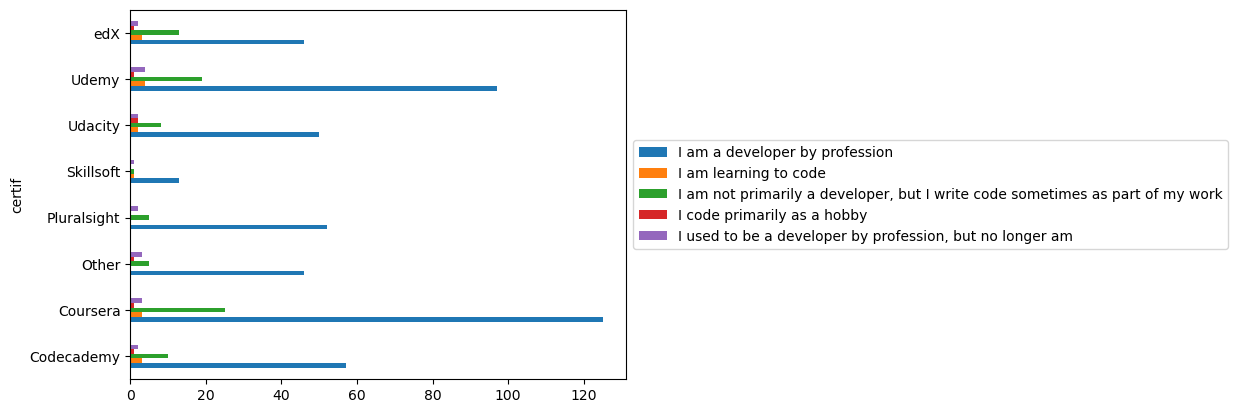

In [454]:
df2022_US_DSall_explode_certif.groupby('MainBranch').certif.value_counts().unstack(0).plot(kind='barh')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [429]:
df_data.LearnCodeCoursesCert.unique()

array([nan, 'Codecademy;Pluralsight', 'Udemy', 'Codecademy;Skillsoft',
       'Coursera;Udemy', 'Coursera;Pluralsight;edX',
       'Coursera;Pluralsight', 'Other', 'Codecademy;edX;Udacity',
       'Coursera', 'Coursera;Udemy;Codecademy', 'Coursera;Other',
       'Coursera;Udemy;Codecademy;edX;Udacity', 'Coursera;edX',
       'Udemy;Pluralsight', 'Coursera;Udacity',
       'Coursera;Codecademy;edX;Udacity', 'Coursera;Udemy;edX;Other',
       'Pluralsight;Udacity', 'Coursera;Udemy;Udacity',
       'Coursera;Udemy;Codecademy;edX', 'Coursera;edX;Udacity;Other',
       'Coursera;Udemy;Pluralsight;Udacity;Skillsoft',
       'Udemy;Pluralsight;Udacity', 'Codecademy;Other',
       'Pluralsight;Other', 'Coursera;Udemy;edX;Udacity',
       'Coursera;Codecademy;Pluralsight', 'Udemy;Skillsoft',
       'Coursera;Udemy;Other', 'Codecademy', 'Coursera;Codecademy', 'edX',
       'Coursera;Udemy;Pluralsight;Udacity',
       'Coursera;Codecademy;Udacity', 'Coursera;Udemy;Pluralsight;edX',
       'Course

In [353]:
data_folks=['Data scientist or machine learning specialist']

df_data=df2022_USpro_explode_devtype[df2022_USpro_explode_devtype['devtype'].isin(data_folks)]
df_data.shape

(532, 77)

I made the decision to work with only participants that identified themselves having a data scientist role. there are in toal 532 survey participants in the US.

157

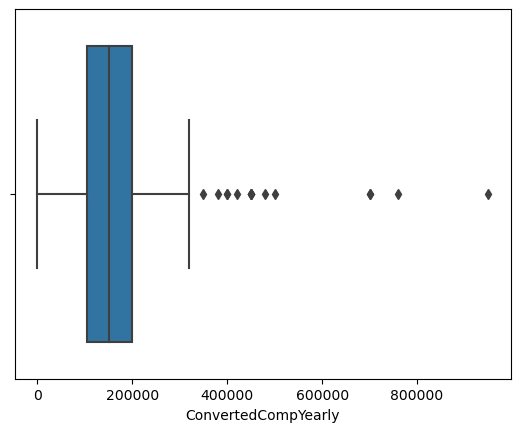

In [455]:
sns.boxplot(x='ConvertedCompYearly',
            data=df_data_drop[df_data_drop['ConvertedCompYearly']<=0.1e7])
plt.ticklabel_format(style='plain', axis='x')
# in the plot, I have removed outliers arbitrarily for salary above UAS1M 

To better visualize salary, I arbitraily removed compensation above USD 1M, even so, the distribution is quite skewed towards the left because of few very high yearly compensation

<AxesSubplot:>

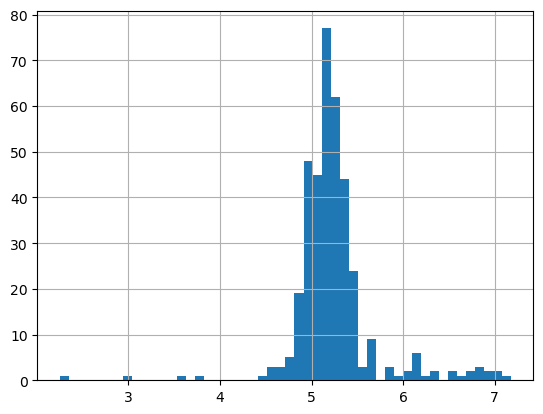

In [384]:
np.log10(df_data_drop['ConvertedCompYearly']).hist(bins=50)

Log transformation of the compensation column allows us to have a more normally distributed curve, so I will check if this can be done in my model directly, or I will transform my target column before fitting the model.

Next on, I will select my features.


### Features 
For the sake of running a simple model, even though I know that other features unrelated to demographic of the survey may help obtain a better model, I will stick to selecting and engineering demographic features for this first exercice. Let's how the model performs.

In [392]:
df_data_drop.columns

Index(['MainBranch', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel',
       'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool',
       'Country', 'Currency', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith',
    

In [403]:
demographics=['ConvertedCompYearly','ConvertedCompYearly_log10','Age', 'Gender', 'Trans', 'Sexuality', 'Ethnicity','Accessibility', 'MentalHealth']

In [404]:
df_demog=df_data_drop[demographics]
df_demog.head()

,ConvertedCompYearly,ConvertedCompYearly_log10,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth
40,95000.0,4.977724,25-34 years old,Man,No,Straight / Heterosexual,White,None of the above,Prefer not to say
55,35000.0,4.544068,25-34 years old,Man,No,Straight / Heterosexual,White,None of the above,I have an anxiety disorder;I have a concentrat...
68,6000000.0,6.778151,45-54 years old,Man,No,Straight / Heterosexual,Prefer not to say,None of the above,None of the above
117,75000.0,4.875061,18-24 years old,Man,No,Straight / Heterosexual,White,None of the above,None of the above
176,150000.0,5.176091,25-34 years old,Man,No,Straight / Heterosexual,White,None of the above,I have an anxiety disorder


In [ ]:
I will first look at missing data in the feature columns, I have already removed rows without target data.

In [405]:
df_demog.isnull().sum()

ConvertedCompYearly           0
ConvertedCompYearly_log10     0
Age                           0
Gender                        0
Trans                         0
Sexuality                     9
Ethnicity                     5
Accessibility                10
MentalHealth                 15
dtype: int64

In [407]:
df_demog['Accessibility'].unique().tolist()

['None of the above',
 nan,
 'I am deaf / hard of hearing',
 'Or, in your own words:',
 'Prefer not to say',
 'I am unable to / find it difficult to walk or stand without assistance',
 'I am blind / have difficulty seeing']

<AxesSubplot:>

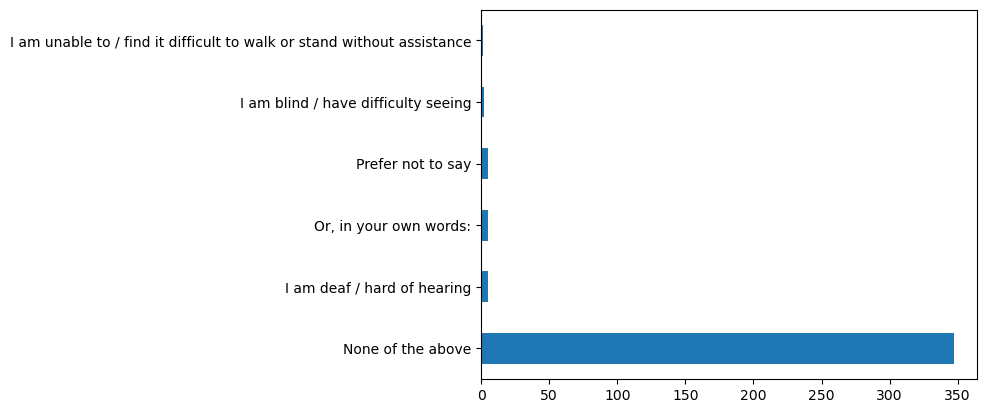

In [411]:
df_demog['Accessibility'].value_counts().plot(kind='barh')

<AxesSubplot:>

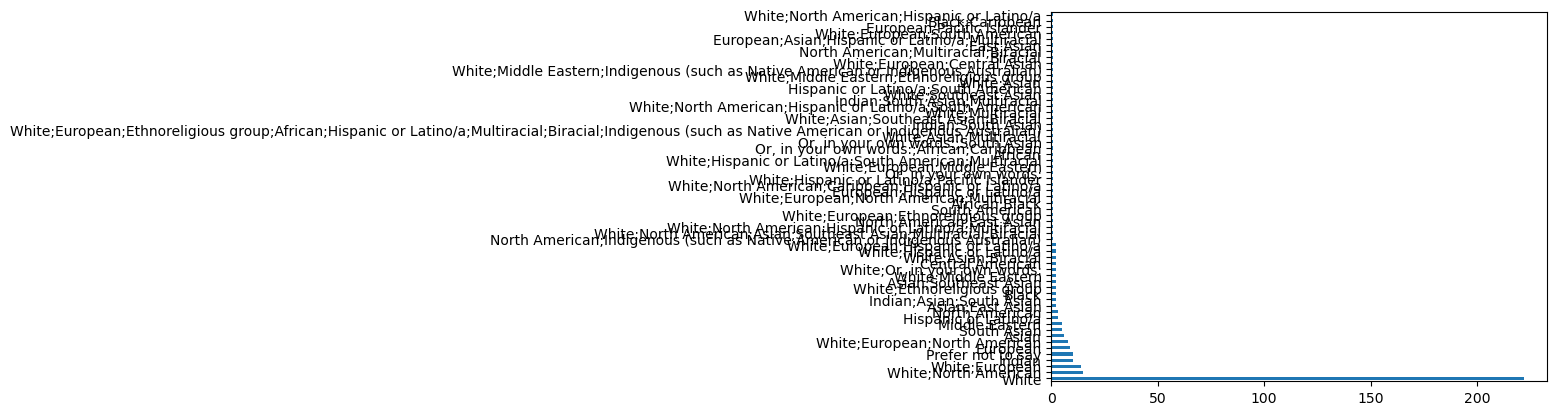

In [415]:
df_demog['Ethnicity'].value_counts().plot(kind='barh')

In [421]:
df_demog['Ethnicity'].apply(lambda x: len(str(x).split(';'))).value_counts()


1    287
2     53
3     26
4      7
8      1
6      1
Name: Ethnicity, dtype: int64

In [63]:
df_dropna_target = df2022.dropna(subset=['ConvertedCompYearly'],axis=0)

In [64]:
df_dropna_target['Currency'].unique()
#I will only use US currency

array(['GBP\tPound sterling', 'ILS\tIsraeli new shekel',
       'EUR European Euro', 'USD\tUnited States dollar',
       'CZK\tCzech koruna', 'CAD\tCanadian dollar', 'PLN\tPolish zloty',
       'NOK\tNorwegian krone', 'TWD\tNew Taiwan dollar',
       'BRL\tBrazilian real', 'UYU\tUruguayan peso', 'SEK\tSwedish krona',
       'TRY\tTurkish lira', 'RON\tRomanian leu', 'SGD\tSingapore dollar',
       'INR\tIndian rupee', 'BGN\tBulgarian lev', 'RUB\tRussian ruble',
       'SAR\tSaudi Arabian riyal', 'KES\tKenyan shilling',
       'CHF\tSwiss franc', 'ZAR\tSouth African rand', 'THB\tThai baht',
       'CNY\tChinese Yuan Renminbi', 'DKK\tDanish krone',
       'AUD\tAustralian dollar', 'VND\tVietnamese dong',
       'ARS\tArgentine peso', 'HUF\tHungarian forint',
       'TND\tTunisian dinar', 'BDT\tBangladeshi taka',
       'MVR\tMaldivian rufiyaa', 'HKD\tHong Kong dollar',
       'MXN\tMexican peso', 'EGP\tEgyptian pound', 'RSD\tSerbian dinar',
       'PKR\tPakistani rupee', 'NPR\tNepalese ru

In [65]:
df_dropna_targetUS=df_dropna_target[df_dropna_target['Currency']=='USD\tUnited States dollar']

In [66]:
df_dropna_targetUS.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
11,12,"I am not primarily a developer, but I write co...","Employed, full-time;Independent contractor, fr...",Fully remote,Hobby;Contribute to open-source projects;Freel...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,NaN,12,...,30-60 minutes a day,60-120 minutes a day,Just right,Innersource initiative;DevOps function;Microse...,Yes,Yes,No,Too short,Easy,194400.0
12,13,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","School (i.e., University, College, etc)",NaN,NaN,12,...,30-60 minutes a day,Less than 15 minutes a day,Somewhat short,DevOps function;Microservices,Yes,No,Yes,Appropriate in length,Easy,65000.0
14,15,I am a developer by profession,"Employed, full-time;Independent contractor, fr...",Fully remote,Hobby;Freelance/contract work,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Written Tutorials;Stack Overflow;Video-based O...,NaN,11,...,30-60 minutes a day,30-60 minutes a day,Somewhat long,DevOps function;Continuous integration (CI) an...,No,Yes,Yes,Appropriate in length,Easy,110000.0
26,27,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Stack Overflow;Online ...,NaN,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,106960.0
28,29,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,30-60 minutes a day,15-30 minutes a day,Somewhat long,Developer portal or other central places to fi...,Yes,Yes,No,Appropriate in length,Easy,130000.0


Finally, to examine compensation, I need to use the column 'ConvertedCompYearly' which is the annual compensation for people who disclosed their compensation. Since some people provided compensation by month or week, it was adjusted in the dataset.

In here, I will focus on data with converted yearly compensation in the US

<AxesSubplot:>

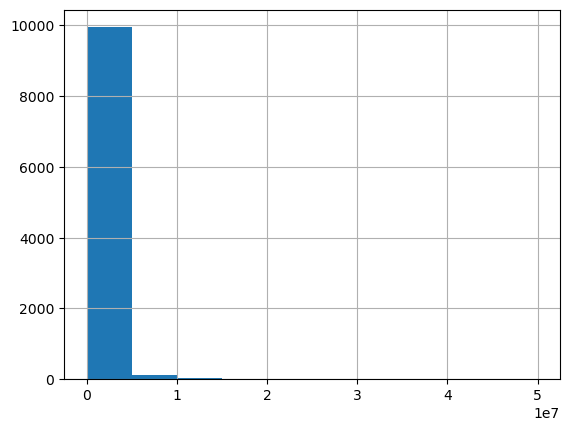

(8418, 79)

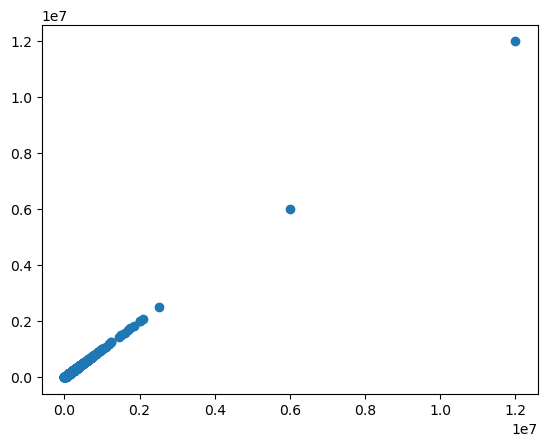

<AxesSubplot:xlabel='ConvertedCompYearly'>

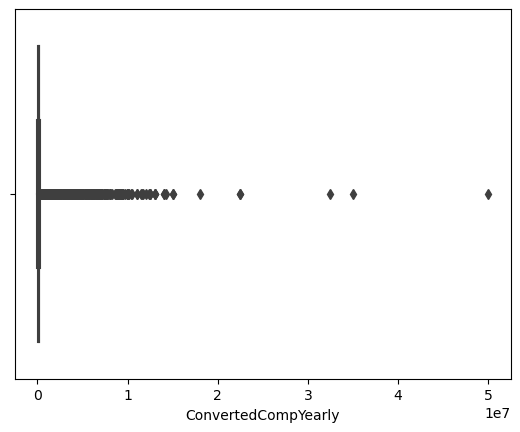

In [102]:
sns.boxplot(x='ConvertedCompYearly',
            data=df_dropna_targetUS)

In [ ]:
sns.boxplot(x='ConvertedCompYearly',
            data=df_dropna_targetUS)

Most of the compensation lie on the left side of the plot so I will remove the few very high compensation and consider them as outliers. From the boxplot, I will say over 2e7

<AxesSubplot:xlabel='ConvertedCompYearly'>

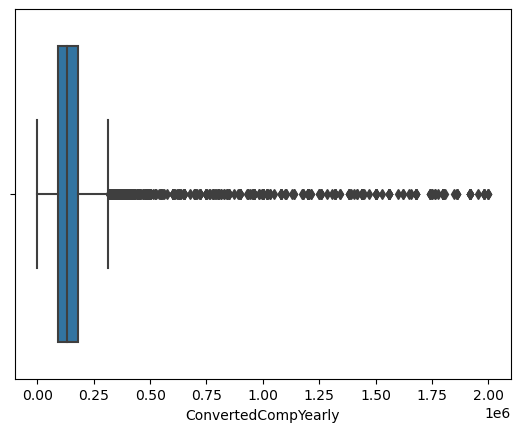

In [109]:

sns.boxplot(x='ConvertedCompYearly',
            data=df_dropna_targetUS[df_dropna_targetUS['ConvertedCompYearly']<=0.2e7])

<AxesSubplot:>

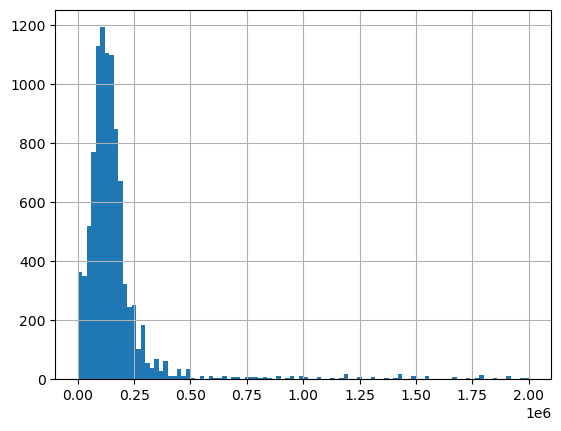

In [121]:
#look at the histogram
df_dropna_targetUS[df_dropna_targetUS['ConvertedCompYearly']<=0.2e7]['ConvertedCompYearly'].hist(bins=100)

In [122]:
df_dropna_targetUS[df_dropna_targetUS['ConvertedCompYearly']<=0.2e7].describe()

,ResponseId,CompTotal,VCHostingPersonal use,VCHostingProfessional use,WorkExp,ConvertedCompYearly
count,9799.000000,9.799000e+03,0.0,0.0,6874.000000,9.799000e+03
mean,36462.400041,1.392258e+05,NaN,NaN,12.877219,1.714767e+05
std,21021.696360,1.136552e+05,NaN,NaN,9.909281,2.073598e+05
min,12.000000,1.000000e+00,NaN,NaN,0.000000,1.000000e+00
25%,16437.500000,8.500000e+04,NaN,NaN,5.000000,9.000000e+04
50%,39134.000000,1.292500e+05,NaN,NaN,10.000000,1.310000e+05
75%,53541.500000,1.750000e+05,NaN,NaN,18.000000,1.800000e+05
max,73120.000000,2.000000e+06,NaN,NaN,50.000000,2.000000e+06


In [26]:
other variables to look at

array([nan, 'Yearly', 'Monthly', 'Weekly'], dtype=object)

'CodingActivities'
'DevType'
'PurchaseInfluence'
'BuyNewTool'
'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith',
       'Blockchain', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm',
       'TBranch', 'ICorPM', 
       'WorkExp'

In [6]:
df2022['MainBranch'].unique()

array(['None of these', 'I am a developer by profession',
       'I am not primarily a developer, but I write code sometimes as part of my work',
       'I code primarily as a hobby', 'I am learning to code',
       'I used to be a developer by profession, but no longer am'],
      dtype=object)

From a first overview of the headers, I want to keep the following columns for sure

In [ ]:
df_keep=df2022['ConvertedCompYearly','Employment', 'RemoteWork','EdLevel', 'LearnCode', 'LearnCodeOnline','LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType','Country', 'Currency','CompTotal', 'CompFreq','Age', 'Gender', 'Trans', 'Sexuality', 'Ethnicity',
       'Accessibility', 'MentalHealth']

In [ ]:
### My three main questions

In [ ]:
# Data Preparation

In [ ]:
## Selected features

In [ ]:
## Missing data

In [ ]:
Question #3

In [ ]:
Salary distribution by devtype

In [115]:
df2022_DS.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

<AxesSubplot:xlabel='ConvertedCompYearly', ylabel='Gender'>

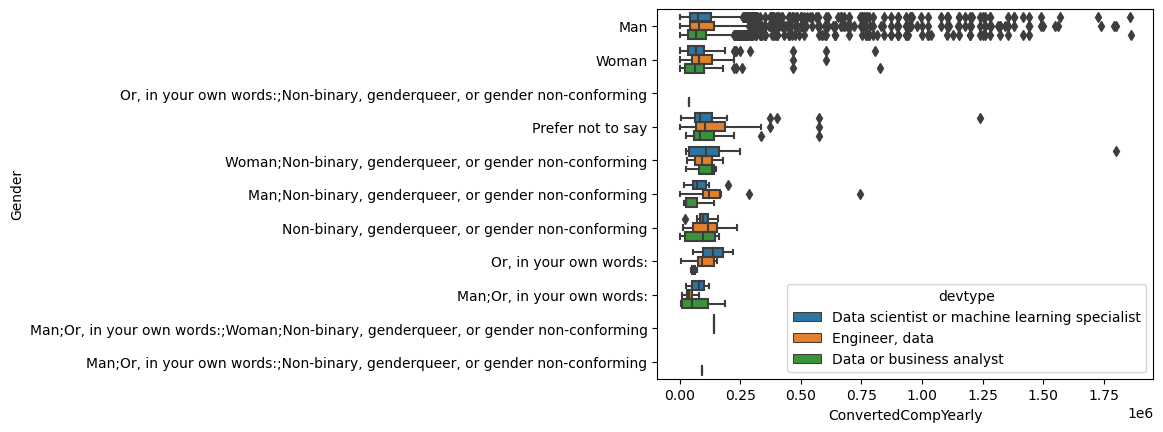

In [128]:
sns.boxplot(data=df2022_DS[df2022_DS['ConvertedCompYearly']<=0.2e7],x='ConvertedCompYearly',y='Gender',hue='devtype')

<AxesSubplot:xlabel='ConvertedCompYearly', ylabel='RemoteWork'>

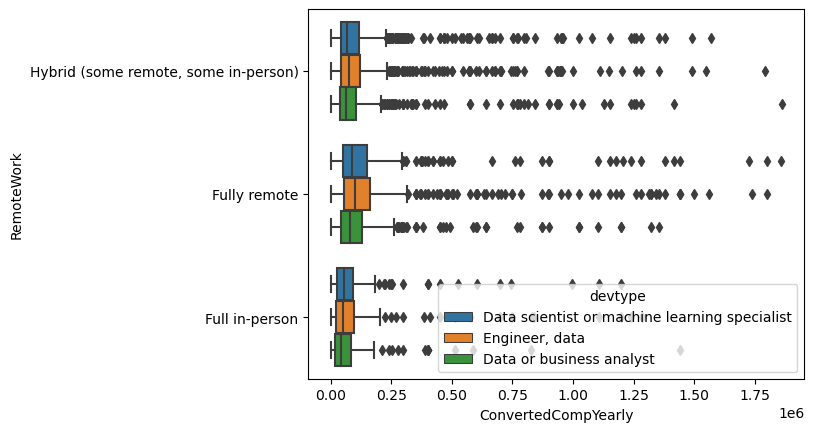

In [140]:
sns.boxplot(data=df2022_DS[df2022_DS['ConvertedCompYearly']<=0.2e7],x='ConvertedCompYearly',y='RemoteWork',hue='devtype')

Resources used for this project:
- https://medium.com/towards-data-science/crisp-dm-methodology-for-your-first-data-science-project-769f35e0346c 
- https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining